**SEGMENTACIÓN CON K-MEANS**<br>
---
Objetivo: Segmentar las frutas de la imagen.

Alumno: Daniel Iván Cruz Flores

In [116]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
from matplotlib import colors
import pandas as pd
import plotly.express as px


img = cv.imread('frutas.jpg')
imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Dimensión de la imagen
print('\nTamaño imagen 1: {} pix'.format(img.shape))
print('\n')



Tamaño imagen 1: (230, 314, 3) pix




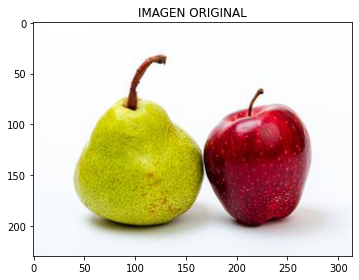

In [117]:
################# FIG: original ##############################################
# Nueva figura
fig = plt.figure()
#plt.figure(figsize=(8,6))

# Imagen original
ax1=plt.subplot(111)
ax1.imshow(imgRGB)
ax1.set_title('IMAGEN ORIGINAL')
plt.tight_layout()    
plt.show()

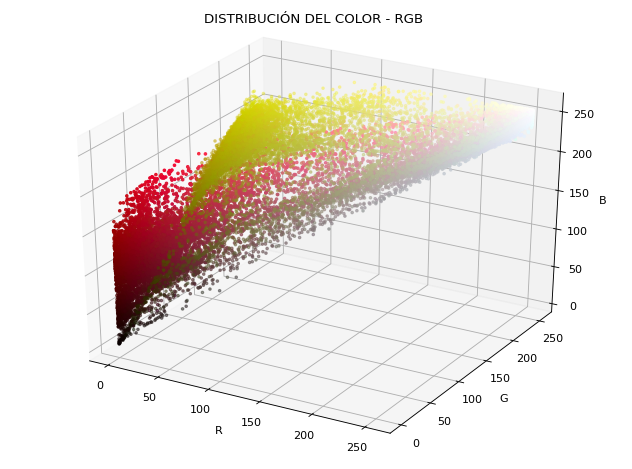

In [118]:

######################### GRAFICO DISTRIBUCIÓN COLOR ###########################
b, g, r = cv.split(imgRGB)

fig = plt.figure(figsize=(8,6),dpi=80)
axis = fig.add_subplot(1,1,1,projection="3d")

# Configuración de color de píxeles
pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1],3))

# Normalizado
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
# Convertir a lista
pixel_colors = norm(pixel_colors).tolist()

# Mostrar diagrama de dispersión 3D
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors=pixel_colors,marker='.')
axis.set_xlabel("R")
axis.set_ylabel("G")
axis.set_zlabel("B")
axis.set_title("DISTRIBUCIÓN DEL COLOR - RGB \n")
plt.tight_layout()
plt.show()


In [119]:
# Cambiamos el tamaño a un array de Mx3 (con M el número de píxels). 
features = img.reshape((-1,3))
#print(features)
print('Dimensión de la matriz de características (espacio RGB): {}'.format(features.shape))
features = np.float32(features)

# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)

K = 3 # porque es el numero de colores mas fuertes

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 15 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features, K, None, criteria, 15, cv.KMEANS_RANDOM_CENTERS)


Dimensión de la matriz de características (espacio RGB): (72220, 3)


In [120]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')
# La función también devuelve un parámetro de "compactación" basado en las 
#diferencias cuadrados entre las muestras y los centros hallados  
compact = np.uint8(compact)
#print('Compactación: \n {} \n'.format(compact))


Centroides: 
 [[ 33 177 184]
 [248 247 246]
 [ 31  21 126]] 



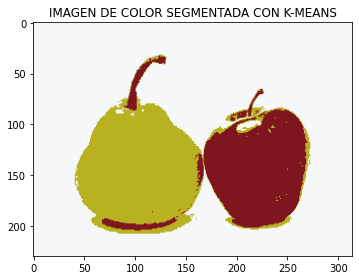

In [121]:
# Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((img.shape))
img_ = cv.cvtColor(img_out,cv.COLOR_BGR2RGB)
segmentado1 = np.copy(img_)

# Nueva figura
fig = plt.figure()

ax1=plt.subplot(111)
ax1.imshow(img_)
ax1.set_title("IMAGEN DE COLOR SEGMENTADA CON K-MEANS")
plt.tight_layout()    
plt.show()

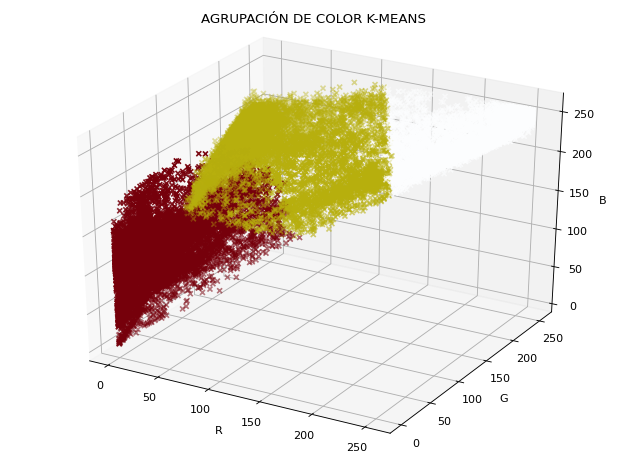

In [122]:

######### GRAFICAMOS LOS GRUPOS LOGRADOS EN K-MEANS ############################
fig = plt.figure(figsize=(8,6),dpi=80)
axis = fig.add_subplot(1,1,1,projection="3d")

# Configuración de color de píxeles
pixel_colors = img_.reshape((np.shape(img)[0]*np.shape(img)[1],3))

# Normalizado
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
# Convertir a lista
pixel_colors = norm(pixel_colors).tolist()

# Mostrar diagrama de dispersión 3D
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors=pixel_colors,marker='x',)
axis.set_xlabel("R")
axis.set_ylabel("G")
axis.set_zlabel("B")
axis.set_title("AGRUPACIÓN DE COLOR K-MEANS \n")
plt.savefig("k_means1.png") # guardamos la imagen para usarlo en la comparación
plt.tight_layout()
plt.show()



In [123]:
############################GENERAR MASCARAS DE SEGENTACIÓN#####################

mask_list = list()
for cluster in color_clusters:
  mask = np.zeros(img_out.shape[:2],'uint8')
  mask[np.where((img_out == cluster).all(axis=2))] = 255
  mask_list.append(mask)

<Figure size 432x288 with 0 Axes>

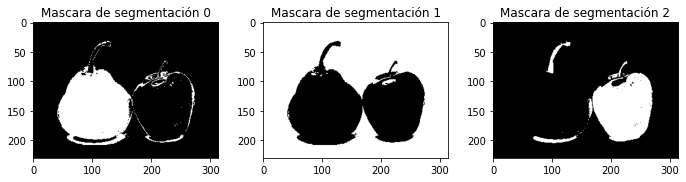

In [124]:
###################### MOSTRAR  MASCARAS DE SEGENTACIÓN    #####################
pos=0
# Nueva figura
fig = plt.figure()
plt.figure(figsize=(16,8))

for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(img, img, mask = mask)

    pos=pos+1
    ax1=plt.subplot(1,5,pos)
    mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
    ax1.imshow(mask)
    ax1.set_title(f'Mascara de segmentación {i}')

plt.tight_layout()    
plt.show()
  

<Figure size 432x288 with 0 Axes>

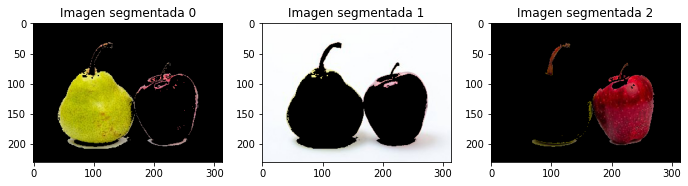

In [125]:
###################### MOSTRAR  IMAGENES SEGENTADAS    #####################
pos=0

fig = plt.figure()
plt.figure(figsize=(16,8))

for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(img, img, mask = mask)
    img_segmented  = cv.cvtColor(img_segmented ,cv.COLOR_BGR2RGB)
    pos=pos+1
    ax1=plt.subplot(1,5,pos)
    ax1.imshow(img_segmented)
    ax1.set_title(f'Imagen segmentada {i}')

plt.tight_layout()    
plt.show()
  

---

**MODIFICACIÓN DEL ESPACIO DE CARACTERISTICAS** <BR>
Se usará tonalidades de gris y puntos X,Y para segmentar la imagen original

Dimensión de la matriz de características (espacio RGB): (36110, 2)
Centroides: 
 [[165 165]
 [ 53  53]
 [249 249]] 



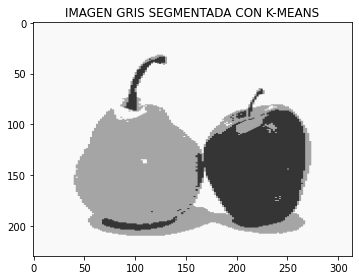

In [126]:

def espacio_features_new(img_gray):
    tonos=[]
    x=[]
    y=[]
    for i in range(img_gray.shape[0]):
      for j in range(img_gray.shape[1]):
          tonos.append(img_gray[i,j])
          x.append(i)
          y.append(j)
    new_features=np.array([tonos,x,y])  
    return new_features     

b, g, r = cv.split(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
features=espacio_features_new(gray)

# Cambiamos el tamaño a un array de Mx2 (con M el número de píxels). 
features = gray.reshape((-1,2))

print('Dimensión de la matriz de características (espacio RGB): {}'.format(features.shape))
features = np.float32(features)

# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 3 # porque es el numero de tonalidades más fuertes

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 15 ejecuciones del algoritmo distintos parametros iniciales 
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features, K, None, criteria, 15, cv.KMEANS_RANDOM_CENTERS)


# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')
# La función también devuelve un parámetro de "compactación" basado en las diferencias cuadradas entre las muestras y los centros hallados  
compact = np.uint8(compact)
#print('Compactación: \n {} \n'.format(compact))

# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. 
# Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((gray.shape))
img_ = cv.cvtColor(img_out,cv.COLOR_BGR2RGB)
segmentado2 = np.copy(img_)

# Nueva figura
fig = plt.figure()
ax1=plt.subplot(111)
ax1.imshow(img_)
ax1.set_title("IMAGEN GRIS SEGMENTADA CON K-MEANS")
plt.tight_layout()    
plt.show()



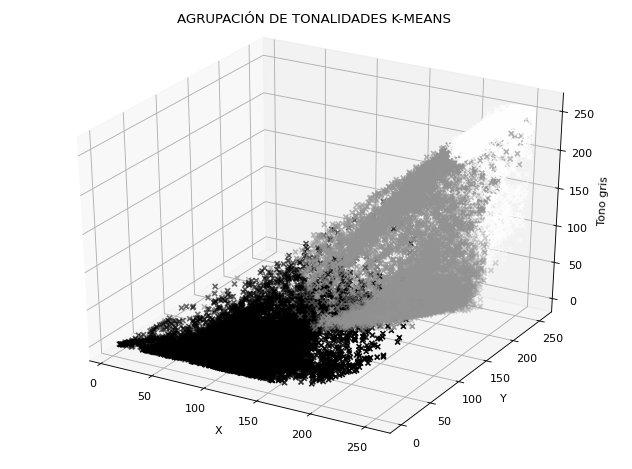

In [127]:

######### GRAFICAMOS LOS GRUPOS LOGRADOS EN K-MEANS ############################
fig = plt.figure(figsize=(8,6),dpi=80)
axis = fig.add_subplot(1,1,1,projection="3d")

# Configuración de color de píxeles
pixel_colors = img_.reshape((np.shape(img)[0]*np.shape(img)[1],3))
# print(pixel_colors)
# Normalizado
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
# Convertir a lista
pixel_colors = norm(pixel_colors).tolist()
# print('*'*20)
# print(pixel_colors)

# Mostrar diagrama de dispersión 3D
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors=pixel_colors,marker='x',)
axis.set_xlabel("X")
axis.set_ylabel("Y")
axis.set_zlabel("Tono gris")
axis.set_title("AGRUPACIÓN DE TONALIDADES K-MEANS \n")
plt.savefig("k_means2.png") # guardamos la imagen para usarlo en la comparación
plt.tight_layout()
plt.show()


---
**RESULTADOS FINALES** <BR>

Comparación de procedimientos. <br>


<Figure size 432x288 with 0 Axes>

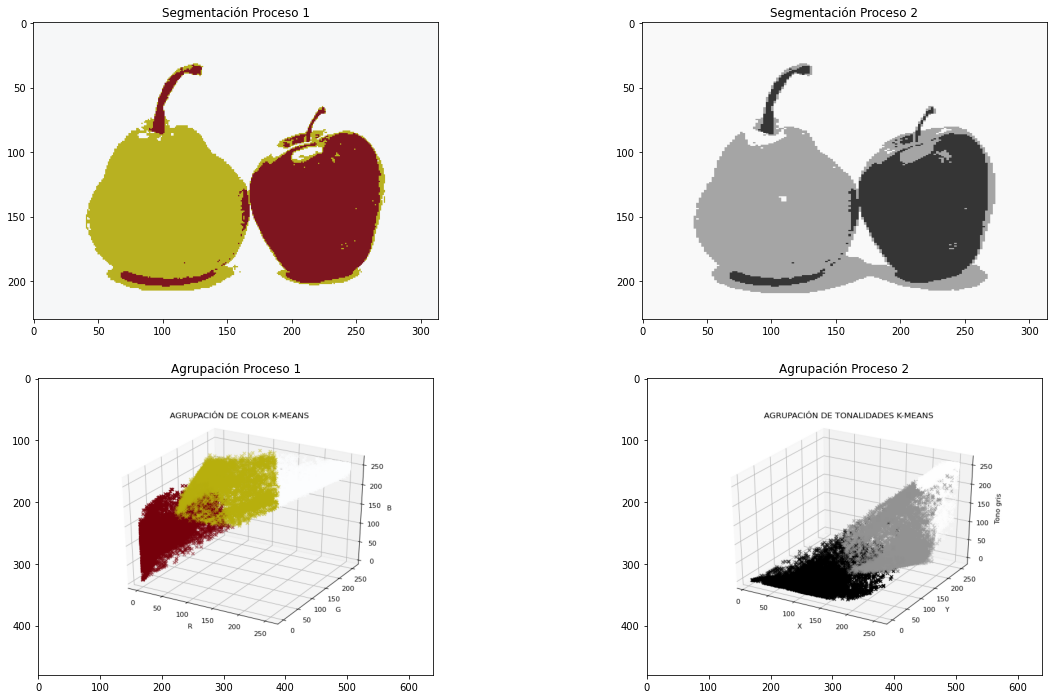

In [128]:
####################### COMPARACIÓN DE RESULTADOS###############################

# se carga imagen de agrupamiento que se generó durante el proceso.
imgK1 = cv.imread('k_means1.png')
imgK1 = cv.cvtColor(imgK1,cv.COLOR_BGR2RGB)

# se carga imagen de agrupamiento que se generó durante el proceso.
imgK2 = cv.imread('k_means2.png')
imgK2 = cv.cvtColor(imgK2,cv.COLOR_BGR2RGB)


fig = plt.figure()
plt.figure(figsize=(20,12))

#carga imagen guardada en memoria temporal durante el proceso
ax1=plt.subplot(221)
ax1.imshow(segmentado1)
ax1.set_title('Segmentación Proceso 1')

#carga imagen guardada en memoria temporal durante el proceso
ax2=plt.subplot(222)
ax2.imshow(segmentado2)
ax2.set_title('Segmentación Proceso 2')

ax2=plt.subplot(223)
ax2.imshow(imgK1)
ax2.set_title('Agrupación Proceso 1')

ax2=plt.subplot(224)
ax2.imshow(imgK2)
ax2.set_title('Agrupación Proceso 2')


fig.tight_layout()    
plt.show()